# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rychard Aprilyanto Candra Pramono]
- **Email:** [rycharda0204@gmail.com]
- **ID Dicoding:** [-]

## Menentukan Pertanyaan Bisnis



```
Pertanyaan
```

- Bagaimana performa rental sepeda dalam beberapa bulan terakhir?
- Pada jam berapa Rental Sepeda ramai dan sepi?
- Pada musim apa rental sepeda ramai ?
- Berapa banyak orang yang memilih sebagai registered user dibandingkan casual user?

## Import Semua Packages/Library yang Digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [2]:
# Directory CSV
data_dir = "E:/Bike_rychard/data/"
#Gather data from Day CSV
hours_df = pd.read_csv(data_dir +"hour.csv")
days_df = pd.read_csv(data_dir +"day.csv")



In [3]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat 2 Dataset , yaitu Day dan Hour


### Assessing Data

Identifikasi Tipe Data


In [5]:
hours_df.info()
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

1.2.2 Cek apakah ada missing value


In [6]:
hours_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang missing di hour.csv

In [7]:
days_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang missing di day.csv

Cek apakah ada duplicate value


In [8]:
print("Jumlah data duplicate di hour.csv =" , hours_df.duplicated().sum())
print("Jumlah data duplicate di day.csv =" , days_df.duplicated().sum())

Jumlah data duplicate di hour.csv = 0
Jumlah data duplicate di day.csv = 0


Cek Parameter Statistik data numerik pada hour.df

In [9]:
hours_df.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Cek Parameter Statistik data numerik pada day.df

In [10]:
days_df.describe(include ="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Data tidak ada yang missing value
- Data tidak ada yang duplicate value
- Data memiliki beberapa data numerik

### Cleaning Data

- Menghapus kolom yang tidak perlu yaitu : <br>
    •	Instant , temp, atemp, hum, windspeed tidak digunakan maka akan didelete <br>
    •	Holiday dan working day akan didelete, karena kolom weekday sudah mewakili ke dua nya <br>
- Mengubah beberapa tipe data sebagai berikut : <br>
    •	Kolom 'season', 'mnth', 'weekday', 'weathersit' merupakan data 'int' akan diubah ke data 'categorical' <br>
        **Data Categorical adalah kumpulan informasi yang berbentuk kelompok/group <br>
    •	Kolom dteday merupakan tipe data 'object' ,akan diubah menjadi tipe data 'datetime' <br>
- Mengkonversi isi beberapa kolom.

In [11]:
hours_df.drop(['workingday','instant','temp','atemp','hum','windspeed'], axis = 1, inplace= True)
days_df.drop(['workingday','instant','temp','atemp','hum','windspeed'], axis = 1, inplace= True)

Ubah data int ke categorical


In [12]:
columns = ['season', 'mnth', 'weekday', 'weathersit']
 
for column in columns:
    days_df[column] =  days_df[column].astype("category")
    hours_df[column] =  hours_df[column].astype("category")

Ubah data object ke datetime

In [13]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

Ubah nama kolom di hour.csv dan day.csv


In [14]:
#Kolom pada day.csv
days_df.rename(columns={'yr':'year','mnth':'month','weekday':'day', 'weathersit':'weather_situation','cnt':'count_cr','hum':'humidity'},inplace=True)

In [15]:
#Kolom pada hour.csv
hours_df.rename(columns={'yr':'year','mnth':'month','weekday':'day', 'weathersit':'weather_situation','cnt':'count_cr','hum':'humidity'},inplace=True)

Konversi beberapa data dalam kolom

In [16]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
days_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hours_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
days_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hours_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
days_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hours_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi day menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
days_df.day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hours_df.day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
days_df.year.replace((0,1), ('2011','2012'), inplace=True)
hours_df.year.replace((0,1), ('2011','2012'), inplace=True)

C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\2974126278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\2974126278.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories ins

In [17]:
hours_df.head()

,dteday,season,year,month,hr,holiday,day,weather_situation,casual,registered,count_cr
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0,1,1


In [18]:
days_df.head()

,dteday,season,year,month,holiday,day,weather_situation,casual,registered,count_cr
0,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,Clear,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,82,1518,1600


**Kesimpulan:**
- Kolom atau data yang tidak dibutuhkan sudah dihilangkan <br>
- Tipe data sudah dirubah <br>
- Nama kolom dan isi kolom sudah dirubah dengan nama yang mudah dipahami<br>

## Exploratory Data Analysis (EDA)

### Explore Data day.csv

In [19]:
#Mengeksplorasi Parameter Statistik dari Data day.csv
days_df.describe(include="all")

,dteday,season,year,month,holiday,day,weather_situation,casual,registered,count_cr
count,731,731,731,731,731.000000,731,731,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,3,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,Sunday,Clear,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,463,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,NaN,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,3410.000000,6946.000000,8714.000000


Terdapat 731 data di day.csv

In [20]:
#Mengurutkan Season dari paling banyak rental
days_df.groupby(by="season").count_cr.sum().sort_values(ascending=False)

C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\1306263035.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="season").count_cr.sum().sort_values(ascending=False)


season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: count_cr, dtype: int64

Season paling banyak rental adalah <b>Fall</b>

In [22]:
#Mengurutkan Bulan paling banyak rental
days_df.groupby(by="month").count_cr.sum().sort_values(ascending=False)

C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\4139577399.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="month").count_cr.sum().sort_values(ascending=False)


month
Aug    351194
Jun    346342
Sep    345991
Jul    344948
May    331686
Oct    322352
Apr    269094
Nov    254831
Mar    228920
Dec    211036
Feb    151352
Jan    134933
Name: count_cr, dtype: int64

Bulan paling banyak rental adalah <b>August / Agustus</b>

In [23]:
#Mengurutkan Hari paling banyak rental
days_df.groupby(by="day").count_cr.sum().sort_values(ascending=False)

C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\950219668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="day").count_cr.sum().sort_values(ascending=False)


day
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: count_cr, dtype: int64

Hari paling banyak rental adalah <b>Friday / Jumat</b>

In [35]:
days_df.groupby(by="weather_situation").count_cr.sum().sort_values(ascending=False)

C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\2147123909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="weather_situation").count_cr.sum().sort_values(ascending=False)


weather_situation
Clear             2257952
Misty              996858
Light_rainsnow      37869
Name: count_cr, dtype: int64

Cuaca paling banyak rental adalah <b>Clear atau Terang</b>

In [25]:
days_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Dalam dua tahun, user yang terdaftar atau teregristrasi lebih banyak. Pada tahun 2011 User teregristasi sebanyak 995851 dan di tahun 2012 1676811

### Explore Data hour.csv

In [26]:
#Mengeksplorasi Parameter Statistik dari Data hour.csv
hours_df.describe(include="all")

,dteday,season,year,month,hr,holiday,day,weather_situation,casual,registered,count_cr
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,4,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,NaN,Saturday,Clear,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,2512,11413,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,NaN,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,NaN,367.000000,886.000000,977.000000


Terdapat 17379 data pada hour.csv, dan rata-rata jam dari peminjaman sepeda adalah 11.54, dengan rentang waktu 00:00 - 23:59

In [27]:
#Mengurutkan Jam paling banyak rental
hours_df.groupby(by="hr").count_cr.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: count_cr, dtype: int64

Dari data diatas didapat bahwa rental sepeda paling banyak pada jam 17:00 sebanyak 336860 dan paling sedikit pada jam 04:00 sebanyak 4428 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa rental sepeda dalam beberapa bulan terakhir?


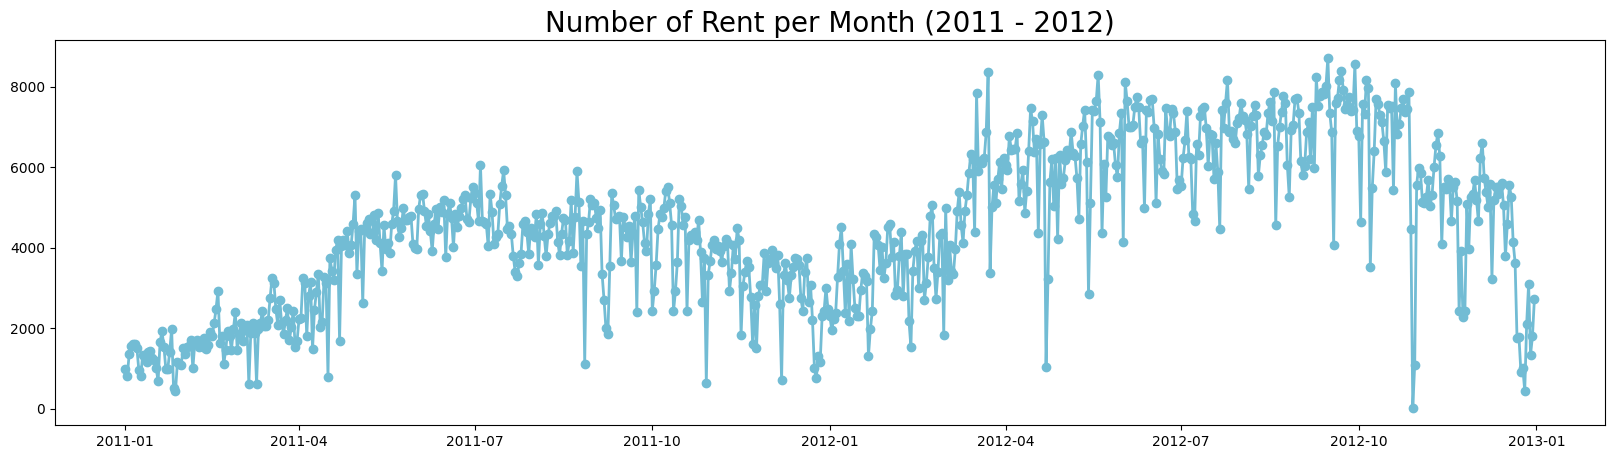

In [ ]:

plt.figure(figsize=(20, 5))
monthly_counts = days_df['count_cr'].groupby(days_df['dteday']).max()
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, color="#86A9BF") 
plt.title("Number of Rent per Month (2011 - 2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

Berdasarkan grafik diatas, Rental tertinggi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Mei 2011, September 2011, Mei 2012, dan November 2012.

### Pertanyaan 2: Pada jam berapa Rental Sepeda ramai dan sepi?

In [44]:
#Menggabungkan dataframe yang dibutuhkan untuk menampilkan jawaban

sum_hours_df = hours_df.groupby("hr").count_cr.sum().sort_values(ascending=False).reset_index()
sum_hours_df.head(10)

,hr,count_cr
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\318003994.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="count_cr", data=sum_hours_df.head(5), palette=colors, ax=ax[0])
C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\318003994.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="count_cr", data=sum_hours_df.sort_values(by="hr", ascending=True).head(5), palette= ["#EEEBE1", "#EEEBE1", "#EEEBE1", "#EEEBE1", "#72BCD4"], ax=ax[1])


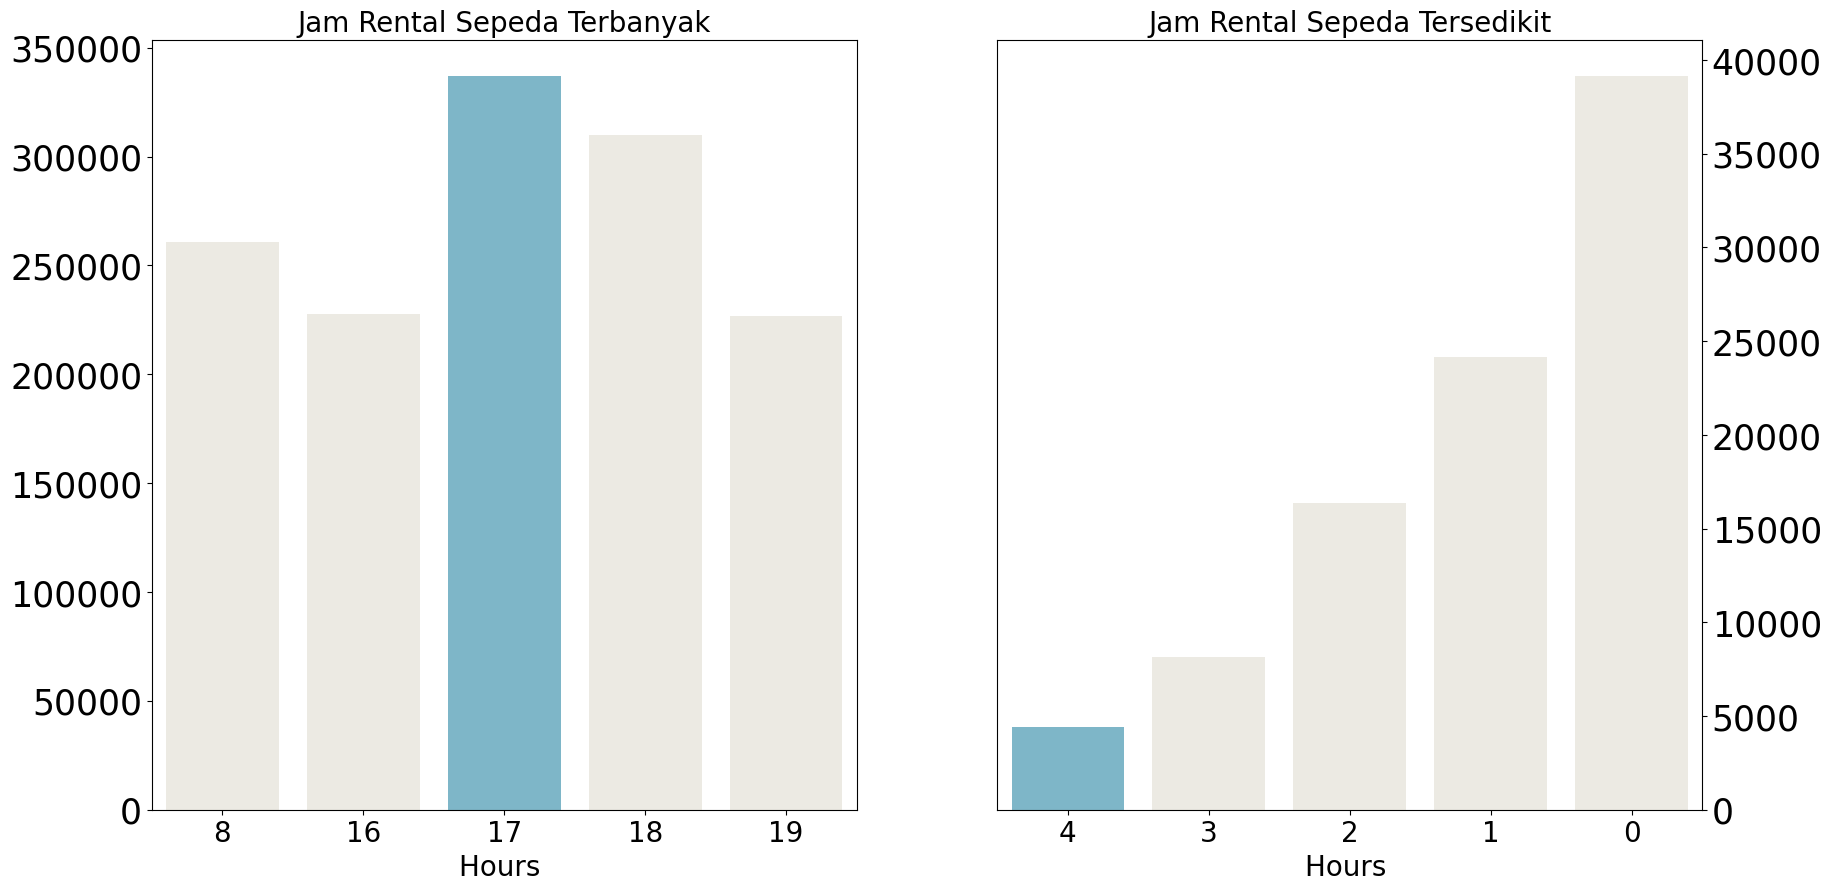

In [ ]:
#membuat dua bar chart untuk perbandingan antara rental paling banyak dan sedikit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

#Warna dari bar rental terbanyak
colors = ["#EEEBE1", "#EEEBE1", "#86A9BF", "#EEEBE1", "#EEEBE1"]

#membuat bar chart jam rental sepeda terbanyak
sns.barplot(x="hr", y="count_cr", data=sum_hours_df.head(5), palette=colors, ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours ", fontsize=20)
ax[0].set_title("Jam Rental Sepeda Terbanyak", loc="center", fontsize=20)
ax[0].tick_params(axis='y', labelsize=25)
ax[0].tick_params(axis='x', labelsize=20)


#membuat bar chart jam rental sepeda tersedikit
sns.barplot(x="hr", y="count_cr", data=sum_hours_df.sort_values(by="hr", ascending=True).head(5), palette= ["#EEEBE1", "#EEEBE1", "#EEEBE1", "#EEEBE1", "#86A9BF"], ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours ", fontsize=20)
ax[1].set_title("Jam Rental Sepeda Tersedikit", loc="center", fontsize=20)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=25)
ax[1].tick_params(axis='x', labelsize=20)



Jam rental sepeda terbanyak pada jam 17:00 sebanyak 336860, dan untuk jam rental sepeda tersedikit jam 04:00 sebanyak 4428 

### Pertanyaan 3: Pada musim apa rental sepeda ramai ?

C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\2505290956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


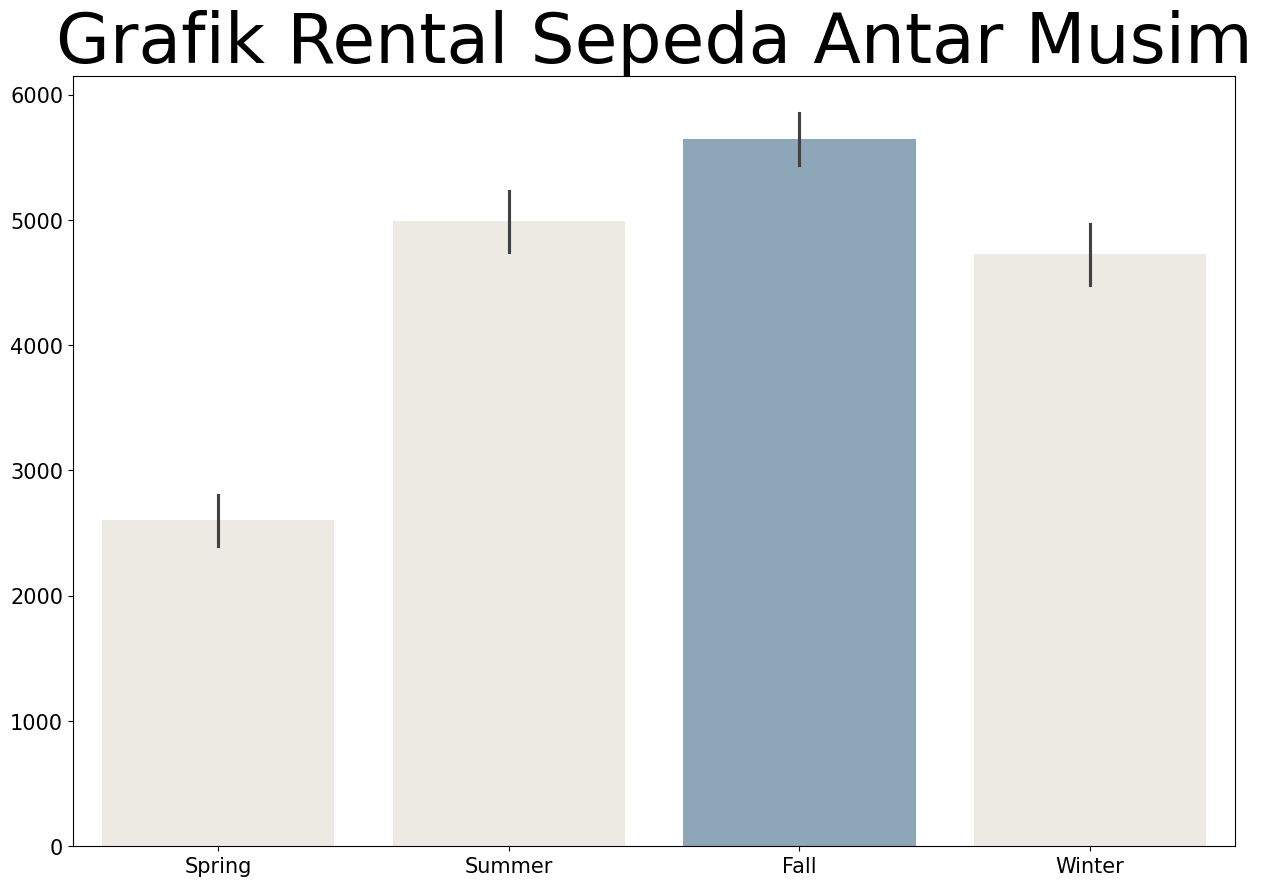

In [65]:
# membuat subplot 1 baris dan 1 kolom
fig, ax = plt.subplots(figsize=(15, 10))

# Buat barplot 
sns.barplot(
        y="count_cr", 
        x="season",
        data=days_df.sort_values(by="season", ascending=True),
        palette=["#EEEBE1", "#EEEBE1", "#86A9BF", "#EEEBE1"],
        ax=ax
    )
# mengatur judul, label y dan x 
ax.set_title("Grafik Rental Sepeda Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# menampilkan plot
plt.show()

Musim paling banyak dalam penyewaan sepeda adalah musim <b>Fall atau Musim Gugur </b> dengan perkiraan 5900 setiap tahunnya

### Pertanyaan 4 : Berapa banyak orang yang memilih sebagai registered user dibandingkan casual user?

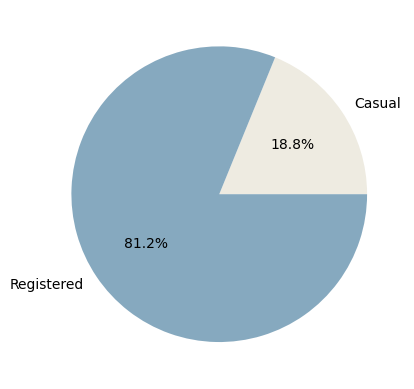

In [66]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(hours_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(hours_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#EEEBE1", "#86A9BF"])

# Menampilkan pie plot
plt.show()

User yang ter-registrasi ada 81.2% dibandingkan user yang casual hanya 18.8%

## Analisis Lanjutan 


### Clustering Analysis : Manual Grouping


Grouping by Jenis Hari (Weekend dan Weekday)

In [105]:
def get_category_days(dayweek):
    if dayweek in ("Saturday", "Sunday"):
        return 'Weekend'
    else: 
        return 'Weekdays'


hours_df['Kategori'] = hours_df.apply(lambda row: get_category_days( row['day']), axis=1)



hours_df.groupby(by="day").agg({
    "count_cr": ["count"],
    "Kategori": ["unique"],})


C:\Users\Risky Malano\AppData\Local\Temp\ipykernel_18956\654426103.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="day").agg({


,count_cr,Kategori
,count,unique
day,,
Sunday,2502,[Weekend]
Monday,2479,[Weekdays]
Tuesday,2453,[Weekdays]
Wednesday,2475,[Weekdays]
Thursday,2471,[Weekdays]
Friday,2487,[Weekdays]
Saturday,2512,[Weekend]


Grouping by Waktu (Pagi, Siang, Sore Malam)



In [103]:
def pembagian_waktu(jam):
    if 6 <= jam <= 11:
        return 'Pagi'
    elif 12 <= jam <= 15:
        return 'Siang'
    elif 16 <= jam <= 18:
        return 'Sore'
    else:
        return 'Malam'


hours_df['periode'] = hours_df['hr'].apply(pembagian_waktu)



hours_df.groupby(by="hr").agg({
    "count_cr": ["count"],
    "periode": ["unique"],})


,count_cr,periode
,count,unique
hr,,
0,726,[Malam]
1,724,[Malam]
2,715,[Malam]
3,697,[Malam]
4,697,[Malam]
5,717,[Malam]
6,725,[Pagi]
7,727,[Pagi]


## Conclusion

- Pertanyaan 1 : Bagaimana performa rental sepeda dalam beberapa bulan terakhir?
- Conclution 1 : Rental tertinggi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Mei 2011, September 2011, Mei 2012, dan November 2012. <br>
<br>
- Pertanyaan 2 : Pada jam berapa Rental Sepeda ramai dan sepi?
- Conclution 2 : Jam rental sepeda terbanyak pada jam 17:00 sebanyak 336860, dan untuk jam rental sepeda tersedikit jam 04:00 sebanyak 4428 <br>
<br>

- Pertanyaan 3 : Pada musim apa rental sepeda ramai ?
- Conclution 3 : Musim paling banyak dalam penyewaan sepeda adalah musim <b>Fall atau Musim Gugur </b> dengan perkiraan 5900 setiap tahunnya<br>
<br>

- Pertanyaan 4 : Berapa banyak orang yang menjadi registered user dibandingkan casual user?
- Conclution 4 : User yang ter-registrasi ada 81.2% dibandingkan user yang casual hanya 18.8% <br>
<br>

Pada Analisis Lanjutan dilakukan Grouping berdasar jenis hari dan periode waktu, yang nantinya dapat menjadi pertimbangan apakah rental sepeda pada waktu yang lebih tinggi dapat ditingkatkan unitnya.

In [104]:
days_df.to_csv("days_procdata.csv", index=False)
hours_df.to_csv("hours_procdata.csv", index=False)